In [5]:
%matplotlib notebook
import numpy as np
from pylab import *
import scipy.stats

In [6]:
def loadcand(fin):
    print('Loading', fin)
    icscand = np.loadtxt(fin, usecols=(0,1,2,3,4,5,6))
    icsmask = (icscand[:,0] >= 7) & (65 < icscand[:,5]) & (icscand[:, 5] < 70) & (icscand[:, 6] == 15)
    icscand = icscand[icsmask, :]
    idxs = np.argsort(icscand[:, 1]) # sort bty sample number
    icscand = icscand[idxs, :]
    return icscand

In [7]:
icscand = loadcand('freddano35.cand.fof')
singlecand = loadcand('SB01781_20180605043248_co15_C000_tethys6.cand.fof.mbeam.2')
toff=31013-27428
icscand[:, 1] -= toff

Loading freddano35.cand.fof
Loading SB01781_20180605043248_co15_C000_tethys6.cand.fof.mbeam.2


<IPython.core.display.Javascript object>


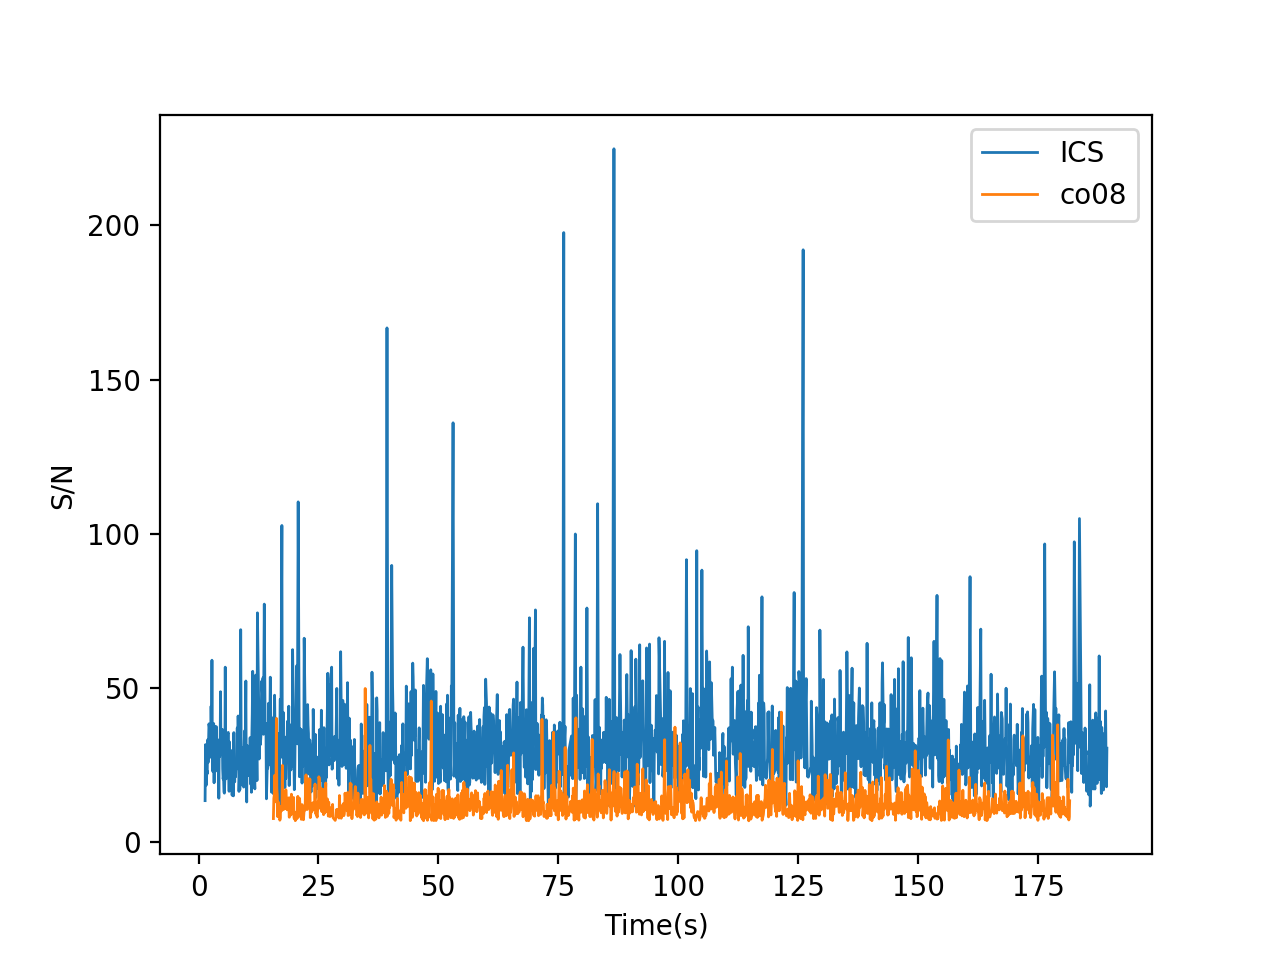

In [8]:
figure()
plot( icscand[:,2],icscand[:,0], label='ICS')
plot(singlecand[:,2], singlecand[:, 0], label='co08')
xlabel('Time(s)')
ylabel('S/N')
legend()


In [10]:
def candjoin(c1, c2, t_tol=4):
    all_cands = []
    ncands, ncols = c1.shape
    for icand in range(ncands):
        thecand = c1[icand, :]
        candt = thecand[1]
        nearest_idx = np.argmin(abs(c2[:, 1] - candt))
        nearest_cand = c2[nearest_idx, :]
        tdist = abs(nearest_cand[1] - candt)
        #print icand, thecand, candt, nearest_idx, nearest_cand, tdist
        if tdist < t_tol:
            all_cands.append((thecand, nearest_cand))
            
    return np.array(all_cands)

In [25]:
jcands = candjoin(icscand, singlecand)

In [26]:
jcands.shape

(1557, 2, 7)

<IPython.core.display.Javascript object>


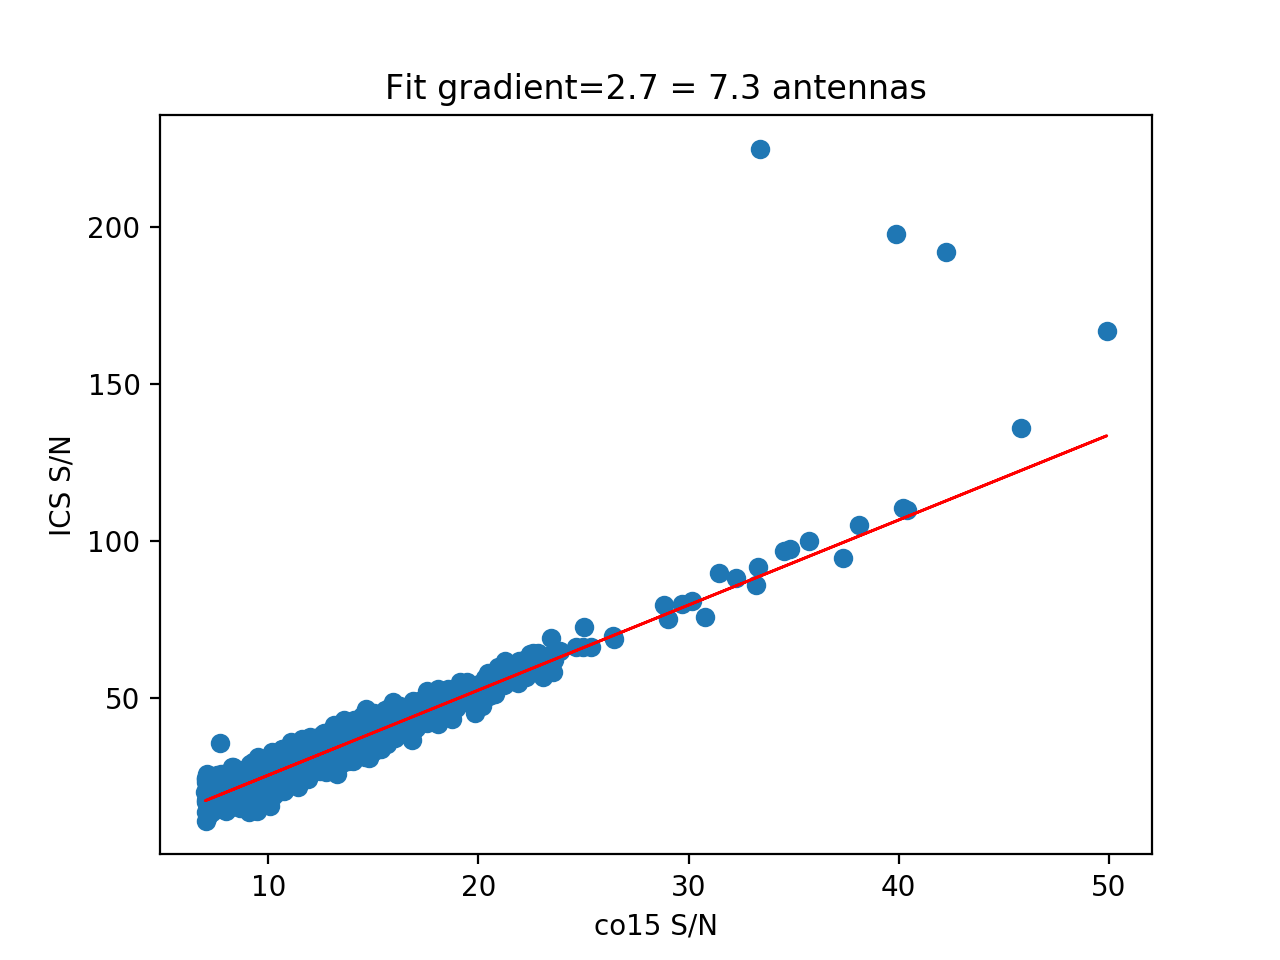

Text(0.5,0,'co15 S/N')

In [27]:
figure()
icssn = jcands[:, 0, 0]
singlesn = jcands[:, 1, 0]
mask = icssn < 110
fit = np.polyfit(singlesn[mask], icssn[mask], 1)
scatter(singlesn, icssn)

plot(singlesn, np.polyval(fit, singlesn), 'r')
title('Fit gradient={:0.1f} = {:0.1f} antennas'.format(fit[0], fit[0]**2))
ylabel('ICS S/N')
xlabel('co15 S/N')

In [ ]:
2.5**2

In [14]:
import glob
candnames = glob.glob('SB*fof*.mbeam.2')
antnames = [f.split('_')[2] for f in candnames]
antcands = [loadcand(f) for f in candnames]
antnames.append('ICS')
antcands.append(icscand)


Loading SB01781_20180605043248_co08_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co13_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co15_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co18_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co25_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co26_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co32_C000_tethys6.cand.fof.mbeam.2
Loading SB01781_20180605043248_co34_C000_tethys6.cand.fof.mbeam.2


In [33]:
nant = len(antnames)
print('NATN', nant, antnames)
nant=9

NATN 9 ['co08', 'co13', 'co15', 'co18', 'co25', 'co26', 'co32', 'co34', 'ICS']


<IPython.core.display.Javascript object>


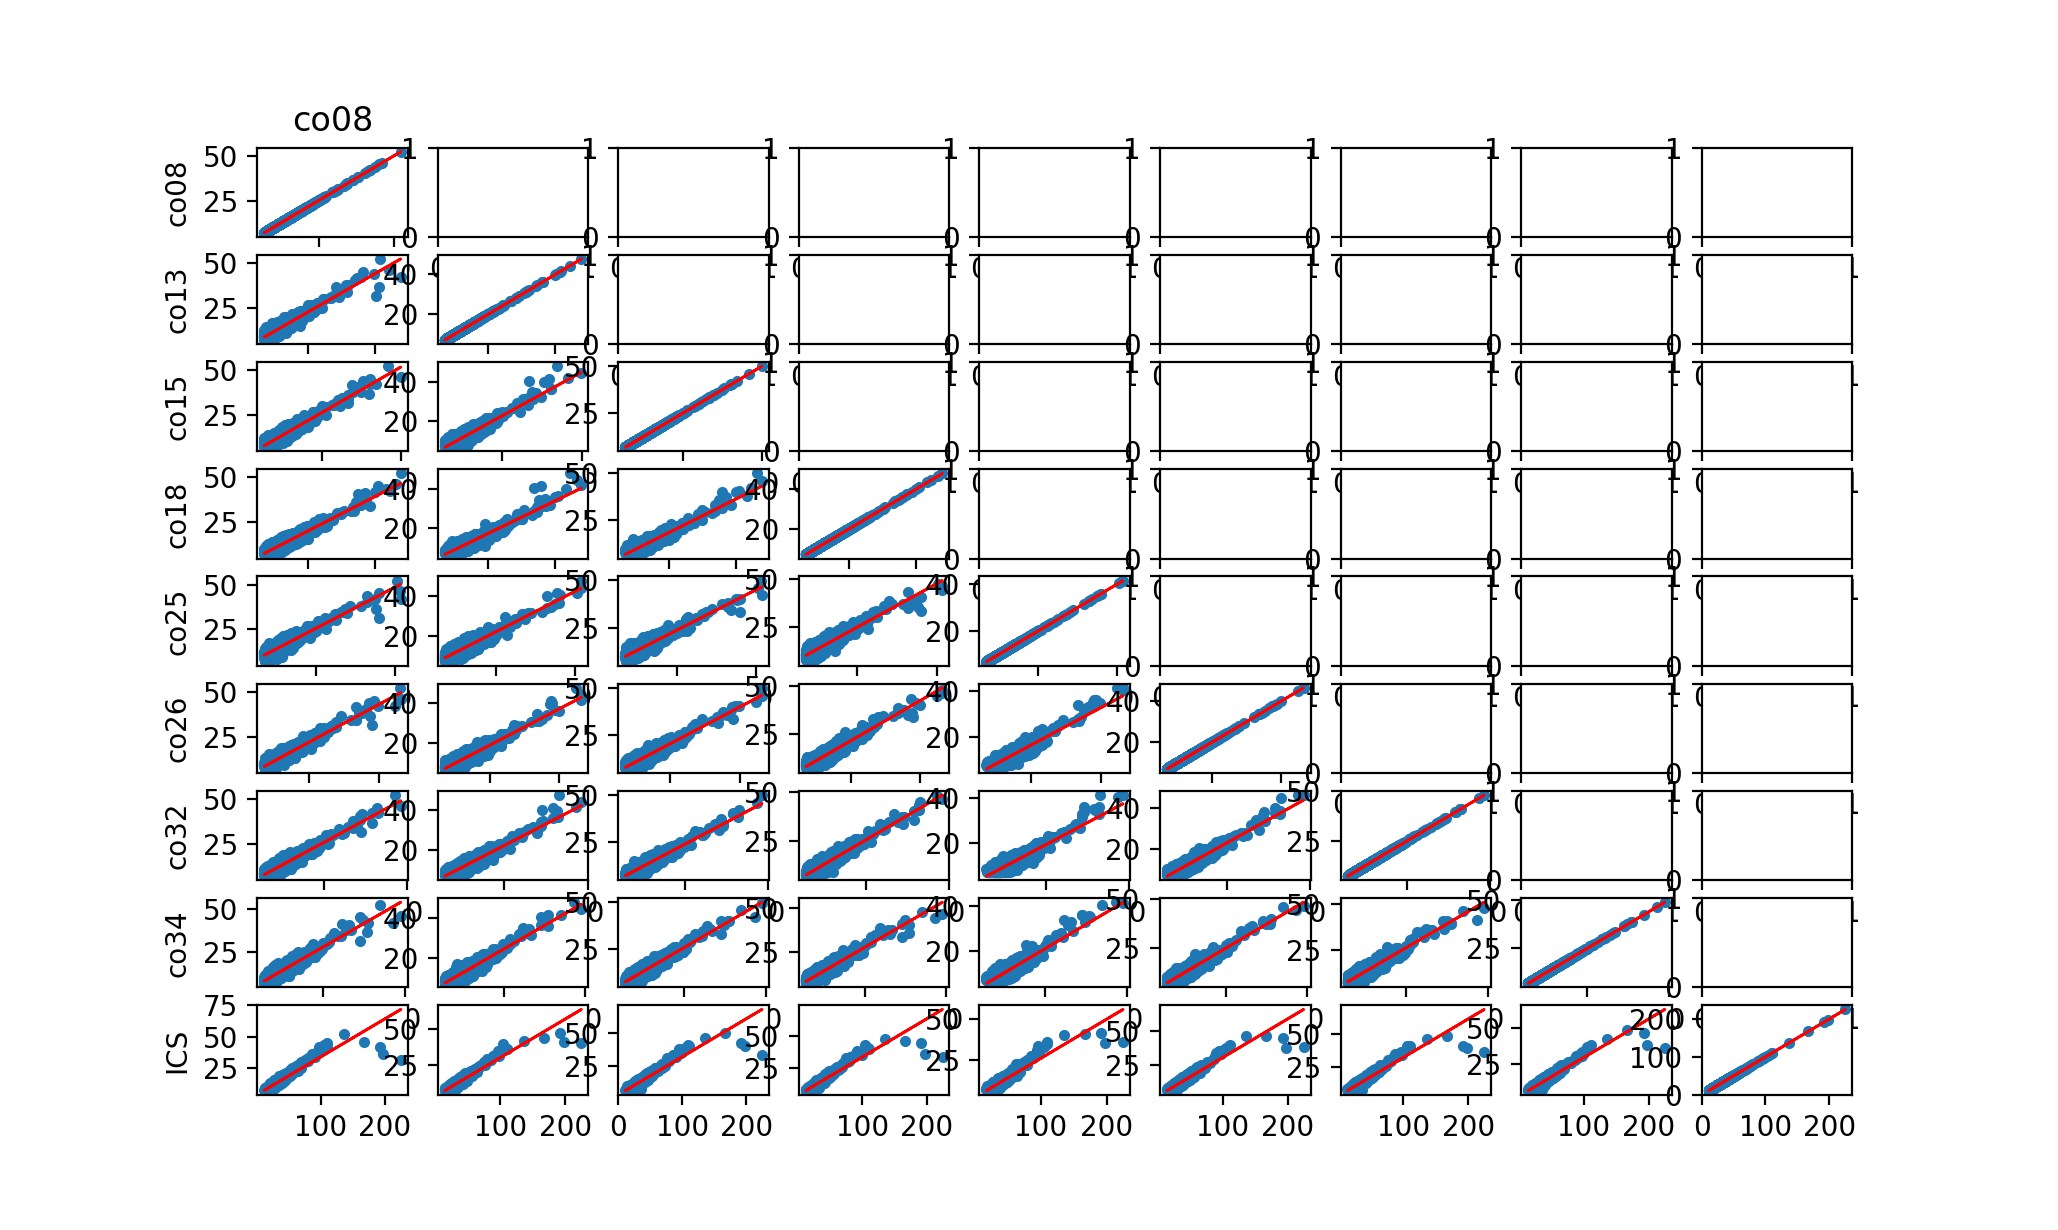

co08 co08 1.0000000000000002
co08 co13 1.0704759846289824
co08 co15 1.0228034807342608
co08 co18 0.9608285121427967
co08 co25 1.1479694229053345
co08 co26 1.044951772025838
co08 co32 1.002858638772734
co08 co34 1.0901209114800008
co08 ICS 0.30383876220145767
co13 co13 1.0000000000000007
co13 co15 0.8872826854112303
co13 co18 0.8311711338564496
co13 co25 1.0176239516446366
co13 co26 0.9117309421274125
co13 co32 0.8711391891002762
co13 co34 0.9510340714363466
co13 ICS 0.2740878780320942
co15 co15 0.9999999999999992
co15 co18 0.88674501656008
co15 co25 1.0673093453534233
co15 co26 0.9685053903998312
co15 co32 0.9275011386099837
co15 co34 1.0133012504724024
co15 ICS 0.2860314104355478
co18 co18 1.0
co18 co25 1.1298193811453652
co18 co26 1.0352785737419627
co18 co32 0.9887945353804397
co18 co34 1.0790185744477934
co18 ICS 0.3030668131318242
co25 co25 0.9999999999999997
co25 co26 0.8207567392444071
co25 co32 0.7883478025129264
co25 co34 0.8535823865775187
co25 ICS 0.2413029695125164
co26 co2

In [34]:
fig, ax = subplots(nant,nant)
for iant1 in range(nant):
    for iant2 in range(iant1, nant):
        jcands = candjoin(antcands[iant1], antcands[iant2])
        #print iant1, iant2, len(jcands), antnames[iant1], antnames[iant2], jcands.shape
        icssn = jcands[:, 0, 0]
        singlesn = jcands[:, 1, 0]
        mask = icssn < 110
        fit = np.polyfit(singlesn[mask], icssn[mask], 1)
        print(antnames[iant1], antnames[iant2], fit[0])
        theax = ax[iant2][iant1]
        theax.scatter(singlesn, icssn,marker='.')
        theax.plot(singlesn, np.polyval(fit, singlesn), 'r')
        if iant1 == 0:
            theax.set_ylabel(antnames[iant2])
        if iant2 == 0:
            theax.set_title(antnames[iant1])

In [ ]:
iant1 = 0
iant2 = 8

x=candjoin(antcands[iant1], antcands[iant2])
print(antcands[iant2].shape)
print(antcands[iant1].shape)
print(x.shape)

In [22]:
x.shape

NameError: name 'x' is not defined

In [23]:
for ia, a in enumerate(antcands):
    print(ia, antnames[ia], len(a))

0 co08 1765
1 co13 1619
2 co15 1707
3 co18 1749
4 co25 1251
5 co26 1655
6 co32 1706
7 co34 1646
8 ICS 1926


In [24]:
icscand = antcands[-1]
print(icscand[0])

[ 1.3538e+01 -2.5020e+03  1.3720e+00  2.0000e+00  7.0000e+01  6.7050e+01
  1.5000e+01]


<IPython.core.display.Javascript object>


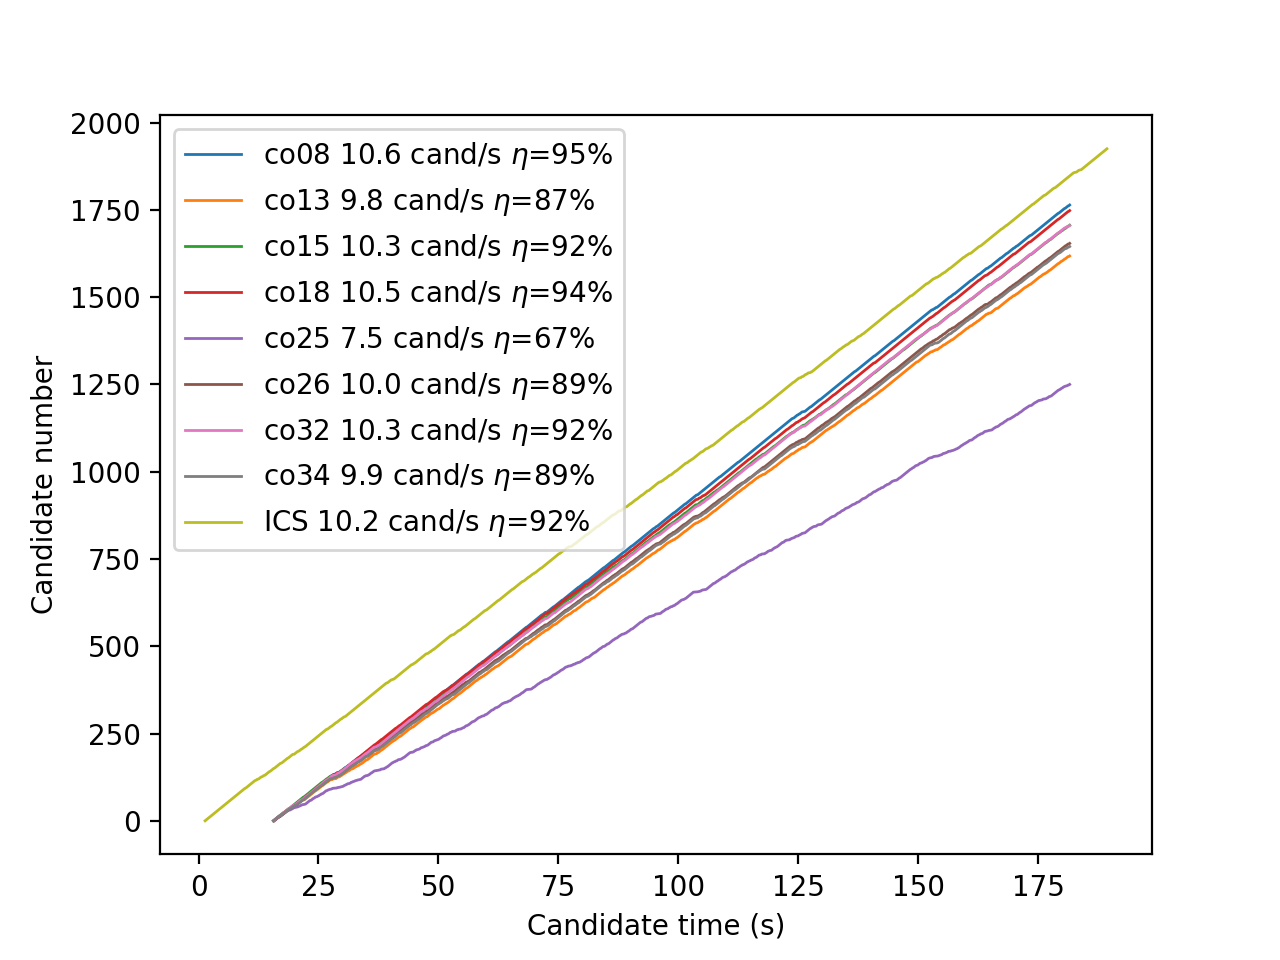

co08 ncand=1765 trange=165.844s candrate=10.64cand/s
co13 ncand=1619 trange=165.844s candrate=9.76cand/s
co15 ncand=1707 trange=165.934s candrate=10.29cand/s
co18 ncand=1749 trange=165.844s candrate=10.55cand/s
co25 ncand=1251 trange=165.844s candrate=7.54cand/s
co26 ncand=1655 trange=165.844s candrate=9.98cand/s
co32 ncand=1706 trange=165.934s candrate=10.28cand/s
co34 ncand=1646 trange=165.934s candrate=9.92cand/s
ICS ncand=1926 trange=187.926s candrate=10.25cand/s


In [25]:
figure()
for ia, a in enumerate(antcands):
    times = a[:, 2]
    candrate = len(times)/(times.max() - times.min())
    s='{} ncand={} trange={}s candrate={:0.2f}cand/s'.format(antnames[ia], len(times), times.max() - times.min(), candrate)
    print(s)
    plot(times, np.arange(len(times)), label='{} {:0.1f} cand/s $\eta$={:0.0f}%'.format(antnames[ia], candrate, candrate/11.195*100.))


ylabel('Candidate number')
xlabel('Candidate time (s)')
legend()

<IPython.core.display.Javascript object>


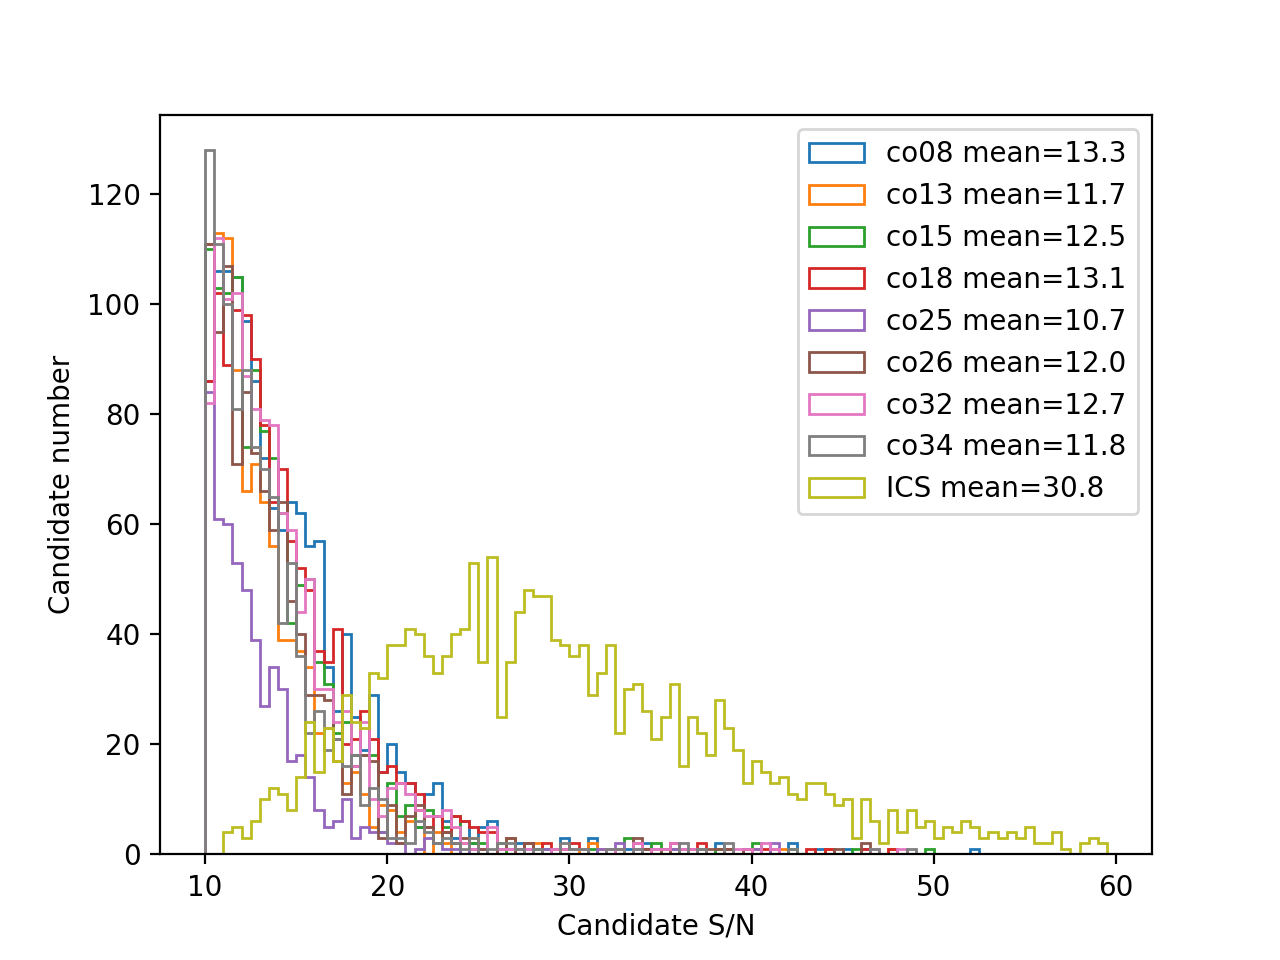

co08 52.218
co13 47.79
co15 49.897
co18 47.761
co25 41.486
co26 46.391
co32 48.14
co34 48.801
ICS 224.866


In [29]:
figure()
for ia, a in enumerate(antcands):
    sn = a[:, 0]
    n, bins, patches = hist(sn, bins=np.arange(10, 60, 0.5), histtype='step', label='{} mean={:0.1f}'.format(antnames[ia], sn.mean()))
    print(antnames[ia], sn.max())
    #fit = scipy.stats.lognorm.fit(bins, n)
    #print antnames[ia], fit
    
ylabel('Candidate number')
xlabel('Candidate S/N')
legend()

In [26]:
hist?

In [27]:
import scipy.stats as stats

<IPython.core.display.Javascript object>


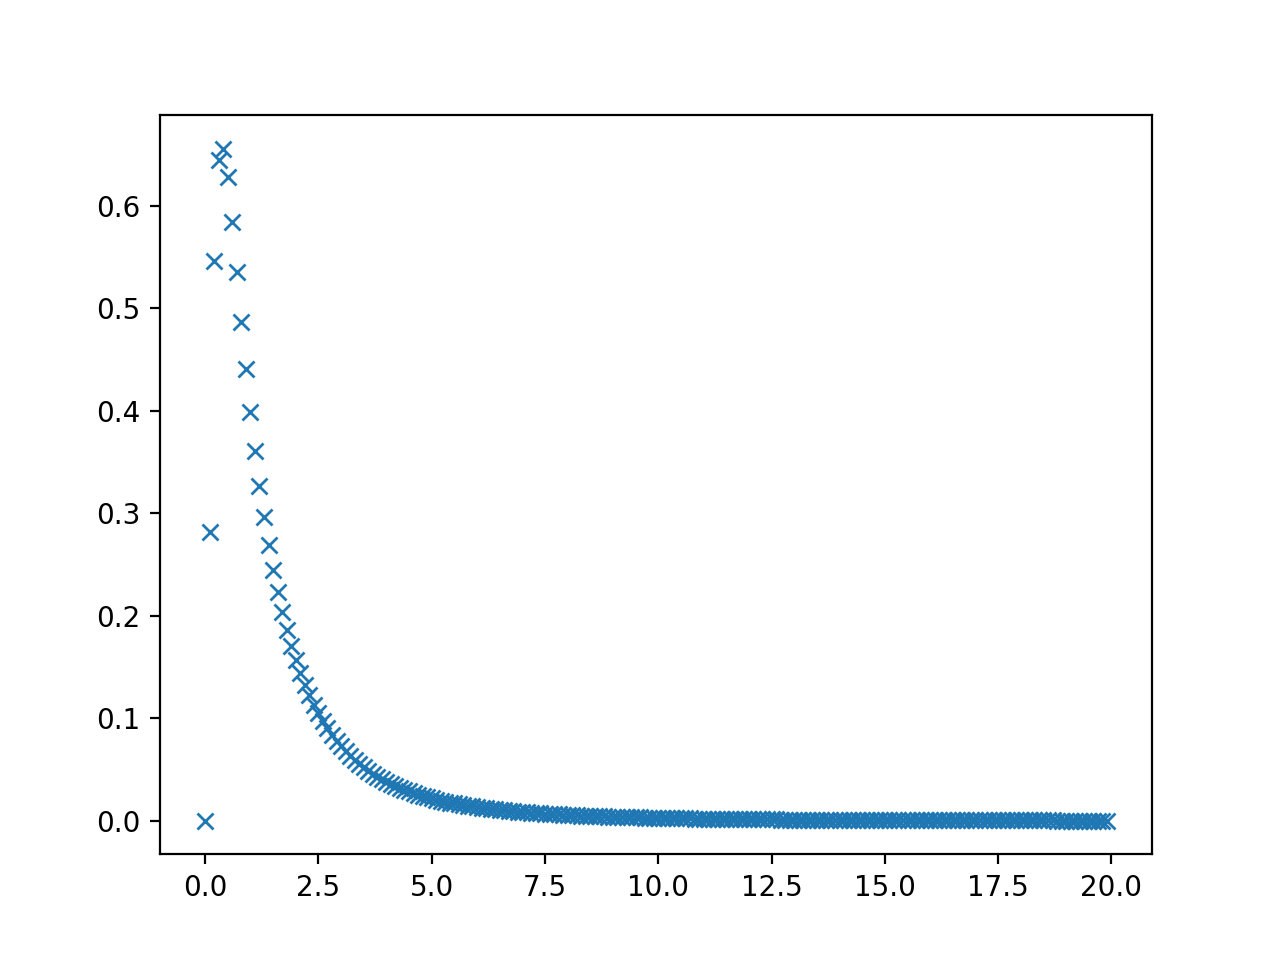

(2.27236001723867, -3.521703165860899e-06, 0.0043806147920892715)


In [28]:
figure()
x = np.arange(0,20,0.1)
y = stats.lognorm.pdf(x,1,)
plot(x, y,'x')
print(stats.lognorm.fit(y))
